<a href="https://colab.research.google.com/github/avoy-mollick-bd/CVPR/blob/main/Mid/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports necessary libraries

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Changed seed value
np.random.seed(42)

Neural Network Class Definition

In [143]:
class MultiClassNN(object):
    def __init__(self):
        input_neurons = 2
        hidden_layer_1_size = 32
        hidden_layer_2_size =8
        hidden_layer_3_size = 8
        output_neurons = 5

        self.learning_rate = 0.01

        self.weights1 = np.random.randn(input_neurons, hidden_layer_1_size)
        self.weights2 = np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
        self.weights3 = np.random.randn(hidden_layer_2_size, hidden_layer_3_size)
        self.weights4 = np.random.randn(hidden_layer_3_size, output_neurons)

        self.biases1 = np.zeros((1, hidden_layer_1_size))
        self.biases2 = np.zeros((1, hidden_layer_2_size))
        self.biases3 = np.zeros((1, hidden_layer_3_size))
        self.biases4 = np.zeros((1, output_neurons))

    # ReLU activation
    def relu_activation(self, vector_x, derivative=False):
        if derivative:
            return (vector_x > 0).astype(float)
        return np.maximum(0, vector_x)

    # Softmax output
    def calculate_softmax(self, vector_x):
        exps = np.exp(vector_x - np.max(vector_x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    # Feedforward
    def forward_pass(self, input_features):
        self.layer1_output = self.relu_activation(np.dot(input_features, self.weights1) + self.biases1)
        self.layer2_output = self.relu_activation(np.dot(self.layer1_output, self.weights2) + self.biases2)
        self.layer3_output = self.relu_activation(np.dot(self.layer2_output, self.weights3) + self.biases3)
        self.final_output = self.calculate_softmax(np.dot(self.layer3_output, self.weights4) + self.biases4)
        return self.final_output

    # Backpropagation
    def back_propagate(self, input_features, one_hot_labels, predictions):
        m = input_features.shape[0]

        # Output layer error
        error_delta4 = (predictions - one_hot_labels) / m
        grad_weights4 = np.dot(self.layer3_output.T, error_delta4)
        grad_biases4 = np.sum(error_delta4, axis=0, keepdims=True)

        # Layer 3
        error_delta3 = np.dot(error_delta4, self.weights4.T) * self.relu_activation(self.layer3_output, derivative=True)
        grad_weights3 = np.dot(self.layer2_output.T, error_delta3)
        grad_biases3 = np.sum(error_delta3, axis=0, keepdims=True)

        # Layer 2
        error_delta2 = np.dot(error_delta3, self.weights3.T) * self.relu_activation(self.layer2_output, derivative=True)
        grad_weights2 = np.dot(self.layer1_output.T, error_delta2)
        grad_biases2 = np.sum(error_delta2, axis=0, keepdims=True)

        # Layer 1
        error_delta1 = np.dot(error_delta2, self.weights2.T) * self.relu_activation(self.layer1_output, derivative=True)
        grad_weights1 = np.dot(input_features.T, error_delta1)
        grad_biases1 = np.sum(error_delta1, axis=0, keepdims=True)


        # Update weights
        self.weights4 -= self.learning_rate * grad_weights4
        self.biases4 -= self.learning_rate * grad_biases4
        self.weights3 -= self.learning_rate * grad_weights3
        self.biases3 -= self.learning_rate * grad_biases3
        self.weights2 -= self.learning_rate * grad_weights2
        self.biases2 -= self.learning_rate * grad_biases2
        self.weights1 -= self.learning_rate * grad_weights1
        self.biases1 -= self.learning_rate * grad_biases1


    # Train
    def train(self, input_features, one_hot_labels):
        predictions = self.forward_pass(input_features)
        self.back_propagate(input_features, one_hot_labels, predictions)

    # Predict
    def predict(self, input_features):
        predictions = self.forward_pass(input_features)
        return np.argmax(predictions, axis=1)

Generate Synthetic Dataset (5 Classes)


In [144]:
num_classes = 5
class_samples = 200
total_samples = num_classes * class_samples

class_centers = np.array([
    [-5.0,  5.0],  # Top Left
    [ 5.0,  5.0],  # Top Right
    [ 0.0,  0.0],  # Center
    [-5.0, -5.0],  # Bottom Left
    [ 5.0, -5.0]   # Bottom Right
])

input_data = np.zeros((total_samples, 2))
labels = np.zeros(total_samples, dtype = int)

for i in range(num_classes):
    start_index = i * class_samples
    end_index = (i+1) * class_samples
    input_data[start_index:end_index] = class_centers[i] + 0.8 * np.random.randn(class_samples, 2)
    labels[start_index:end_index] = i


permutation = np.random.permutation(total_samples)       #Shuffle dataset
input_data = input_data[permutation]
labels = labels[permutation]


# One-hot encoding
def encode_one_hot(input_labels, num_output_classes):
    oh_encoded = np.zeros((input_labels.shape[0], num_output_classes))
    for i in range(input_labels.shape[0]):
        oh_encoded[i, input_labels[i]] = 1
    return oh_encoded


one_hot_labels = encode_one_hot(labels, num_classes)

# Train/Test split
train_test_split_idx = int(0.8 * total_samples)
X_train, X_test = input_data[:train_test_split_idx], input_data[train_test_split_idx:]
Y_train_oh, Y_test_oh = one_hot_labels[:train_test_split_idx], one_hot_labels[train_test_split_idx:]
y_train, y_test = labels[:train_test_split_idx], labels[train_test_split_idx:]

Plot Synthetic Dataset

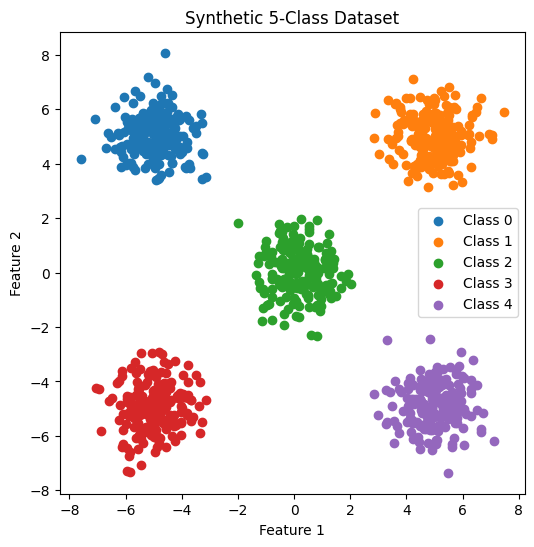

In [145]:
plt.figure(figsize=(6,6))
for class_c in range(num_classes):
    plt.scatter(input_data[labels==class_c,0], input_data[labels==class_c,1], label=f'Class {class_c}')
plt.title("Synthetic 5-Class Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Training Loop with Loss and Accuracy

In [146]:
model = MultiClassNN()
num_epochs = 600
training_loss_history = []
training_accuracy_history = []

for i in range(num_epochs):
    model.train(X_train, Y_train_oh)

    train_predictions_oh = model.forward_pass(X_train)

    # Loss (Mean Squared Error)
    training_loss_history.append(np.mean(np.square(Y_train_oh - train_predictions_oh)))

    # Accuracy
    train_predictions_class = np.argmax(train_predictions_oh, axis=1)
    training_accuracy_history.append(np.mean(train_predictions_class == y_train))

    # Print every 20 epochs
    if (i+1) % 20 == 0:
        print(f"Epoch {i+1}: Loss={training_loss_history[-1]:.4f}, Accuracy={training_accuracy_history[-1]:.4f}")

Epoch 20: Loss=0.0476, Accuracy=0.8263
Epoch 40: Loss=0.0378, Accuracy=0.8588
Epoch 60: Loss=0.0336, Accuracy=0.8725
Epoch 80: Loss=0.0305, Accuracy=0.8938
Epoch 100: Loss=0.0285, Accuracy=0.9025
Epoch 120: Loss=0.0269, Accuracy=0.9087
Epoch 140: Loss=0.0254, Accuracy=0.9213
Epoch 160: Loss=0.0241, Accuracy=0.9275
Epoch 180: Loss=0.0229, Accuracy=0.9350
Epoch 200: Loss=0.0217, Accuracy=0.9475
Epoch 220: Loss=0.0207, Accuracy=0.9513
Epoch 240: Loss=0.0197, Accuracy=0.9587
Epoch 260: Loss=0.0187, Accuracy=0.9613
Epoch 280: Loss=0.0177, Accuracy=0.9663
Epoch 300: Loss=0.0169, Accuracy=0.9712
Epoch 320: Loss=0.0161, Accuracy=0.9750
Epoch 340: Loss=0.0154, Accuracy=0.9762
Epoch 360: Loss=0.0148, Accuracy=0.9775
Epoch 380: Loss=0.0143, Accuracy=0.9800
Epoch 400: Loss=0.0138, Accuracy=0.9812
Epoch 420: Loss=0.0133, Accuracy=0.9825
Epoch 440: Loss=0.0128, Accuracy=0.9825
Epoch 460: Loss=0.0124, Accuracy=0.9825
Epoch 480: Loss=0.0120, Accuracy=0.9838
Epoch 500: Loss=0.0116, Accuracy=0.9862
Epoc

Loss and Accuracy Plot

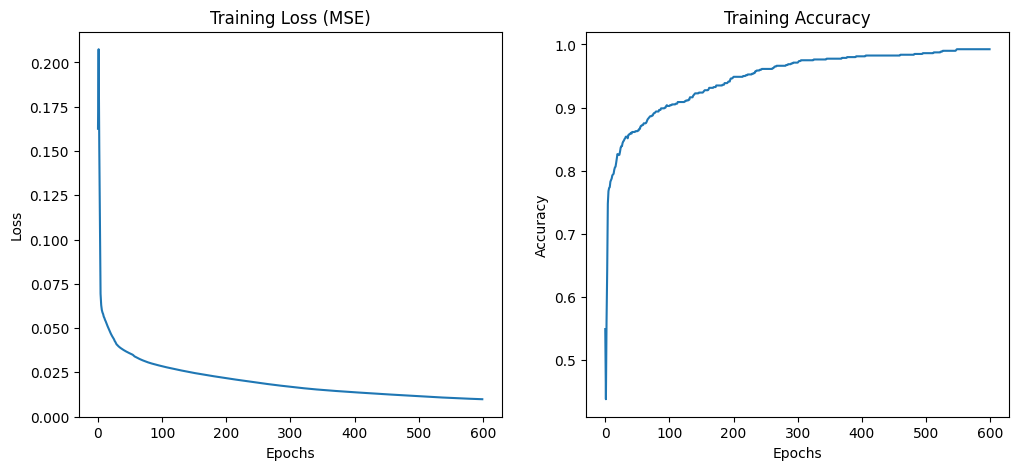

In [147]:
# Loss Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(training_loss_history)
plt.title("Training Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(training_accuracy_history)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Model Evaluation on Test Set

In [148]:
test_predictions_class = model.predict(X_test)

# Overall Accuracy
accuracy = np.mean(test_predictions_class == y_test)
print("Test Accuracy:", accuracy)

# Precision, Recall, F1 per class
precision_list, recall_list, f1_list = [], [], []

for class_c in range(num_classes):
    true_positives = np.sum((y_test == class_c) & (test_predictions_class == class_c))
    false_positives = np.sum((y_test != class_c) & (test_predictions_class == class_c))
    false_negatives = np.sum((y_test == class_c) & (test_predictions_class != class_c))

    precision_val = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall_val = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score_val = 2 * precision_val * recall_val / (precision_val + recall_val) if (precision_val + recall_val) > 0 else 0

    precision_list.append(precision_val)
    recall_list.append(recall_val)
    f1_list.append(f1_score_val)

for class_c in range(num_classes):
    print(f"Class {class_c}: Precision={precision_list[class_c]:.3f}, Recall={recall_list[class_c]:.3f}, F1-score={f1_list[class_c]:.3f}")

print("Overall Macro F1-score:", np.mean(f1_list))

Test Accuracy: 0.98
Class 0: Precision=1.000, Recall=1.000, F1-score=1.000
Class 1: Precision=0.917, Recall=1.000, F1-score=0.957
Class 2: Precision=1.000, Recall=0.902, F1-score=0.949
Class 3: Precision=1.000, Recall=1.000, F1-score=1.000
Class 4: Precision=0.978, Recall=1.000, F1-score=0.989
Overall Macro F1-score: 0.9788007465584407


Confusion Matrix

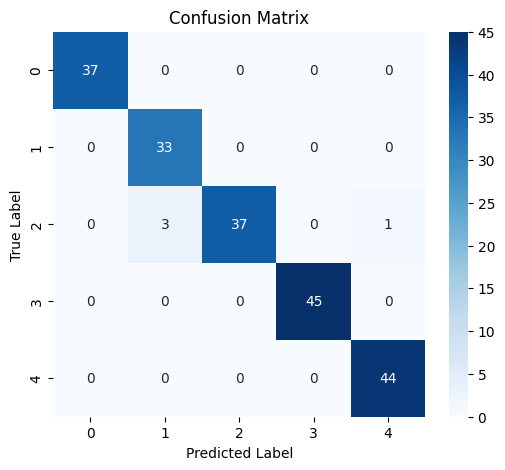

Confusion Matrix (rows=true, columns=predicted):
[[37  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  3 37  0  1]
 [ 0  0  0 45  0]
 [ 0  0  0  0 44]]


In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, test_predictions_class)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix (rows=true, columns=predicted):")
print(cm)

Plot Dataset with Predicted Labels

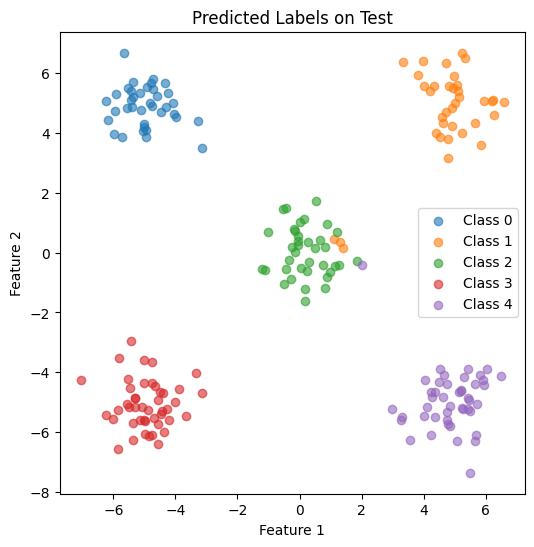

In [150]:
plt.figure(figsize=(6,6))
for class_c in range(num_classes):
    plt.scatter(X_test[test_predictions_class==class_c,0], X_test[test_predictions_class==class_c,1], label=f'Class {class_c}', alpha=0.6)
plt.title("Predicted Labels on Test")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**Summary of Results:**
The three hidden layers provided a good balance between model complexity and accuracy. Overall, the network performed well on this synthetic dataset with proper hyperparameter tuning.

# Discussion
In this assignment, i have implemented a three hidden layer neural network for multi-class classification on a synthetic dataset with five classes. Using ReLU in hidden layers and softmax in the output layer allowed the network to learn efficiently and handle multiple classes effectively.

The network successfully reduced loss and improved accuracy over training, with evaluation metrics accuracy, precision, recall, and F1-score demonstrating good performance. The confusion matrix confirmed that most samples were correctly classified.

Key challenges included adapting backpropagation for multi-class output and tuning weights and learning rate. Lessons learned highlight the importance of activation functions and proper loss calculation. Future improvements could include larger datasets, different hidden layer sizes, regularization techniques, or advanced optimizers to further enhance performance.